In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize']  = (10, 6)

In [106]:
x_data = np.random.rand(100).astype(np.float32)

In [116]:
a = 3
b = 2
y_data = a * x_data + b
y_data = np.vectorize(lambda y: y+np.random.normal(loc=0.0, scale=0.3))(y_data)

In [117]:
print('Sample points:',list(zip(x_data, y_data))[0:5])

Sample points: [(0.039563265, 2.4444193168827808), (0.048230954, 2.058696891386016), (0.16065456, 2.8984075888025331), (0.69139093, 3.8776412109516509), (0.13093212, 2.1345230473461787)]


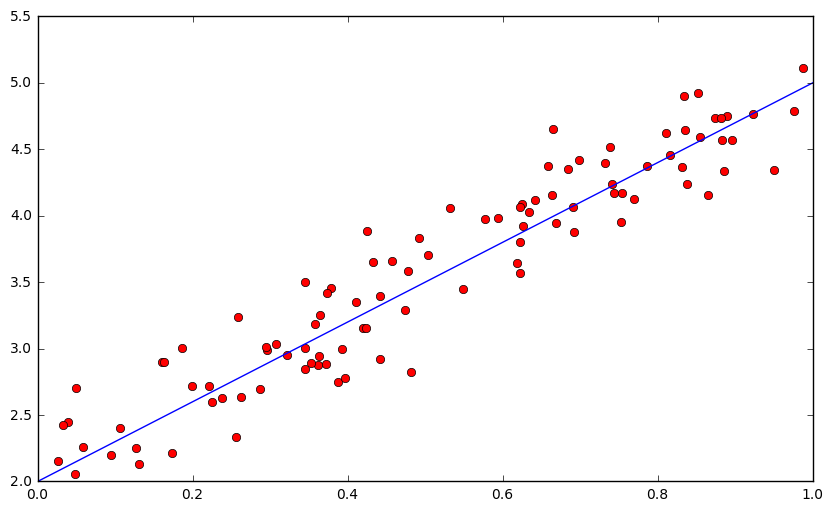

In [118]:
plt.plot(x_data, y_data, 'ro')
xx = np.linspace(0, 1, 100)
plt.plot(xx, a*xx+b)

## Linear Regression in TensorFlow

In [134]:
a = tf.Variable(1.0)
b = tf.Variable(0.2)
y = a * x_data + b

loss = tf.reduce_mean(tf.square(y - y_data))

In [135]:
optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(loss)


In [136]:
## initialize variables
init_op = tf.initialize_all_variables()


In [137]:
session = tf.Session()
session.run(init_op)

In [138]:
train_data = []
for step in range(200):
    evals = session.run([train, a, b])[1:]
    if step % 5 == 0:
        print(step, evals)
        train_data.append(evals)

0 [1.0, 0.2]
5 [2.3848968, 2.3731663]
10 [2.5081856, 2.3021543]
15 [2.6028554, 2.2511389]
20 [2.674438, 2.2125592]
25 [2.7285652, 2.183387]
30 [2.7694936, 2.1613288]
35 [2.8004417, 2.144649]
40 [2.8238435, 2.1320364]
45 [2.8415389, 2.1224997]
50 [2.8549194, 2.1152883]
55 [2.865037, 2.1098354]
60 [2.8726876, 2.1057119]
65 [2.8784723, 2.1025941]
70 [2.8828466, 2.1002367]
75 [2.8861542, 2.098454]
80 [2.8886549, 2.0971062]
85 [2.8905461, 2.096087]
90 [2.8919761, 2.0953162]
95 [2.8930573, 2.0947335]
100 [2.8938751, 2.0942929]
105 [2.8944933, 2.0939596]
110 [2.8949609, 2.0937076]
115 [2.8953145, 2.0935171]
120 [2.8955817, 2.0933731]
125 [2.8957839, 2.0932641]
130 [2.8959367, 2.0931816]
135 [2.8960521, 2.0931194]
140 [2.8961396, 2.0930724]
145 [2.8962057, 2.0930367]
150 [2.8962555, 2.0930099]
155 [2.8962932, 2.0929897]
160 [2.8963218, 2.0929742]
165 [2.8963432, 2.0929625]
170 [2.8963597, 2.0929537]
175 [2.8963721, 2.092947]
180 [2.8963814, 2.092942]
185 [2.8963885, 2.0929382]
190 [2.896394, 2

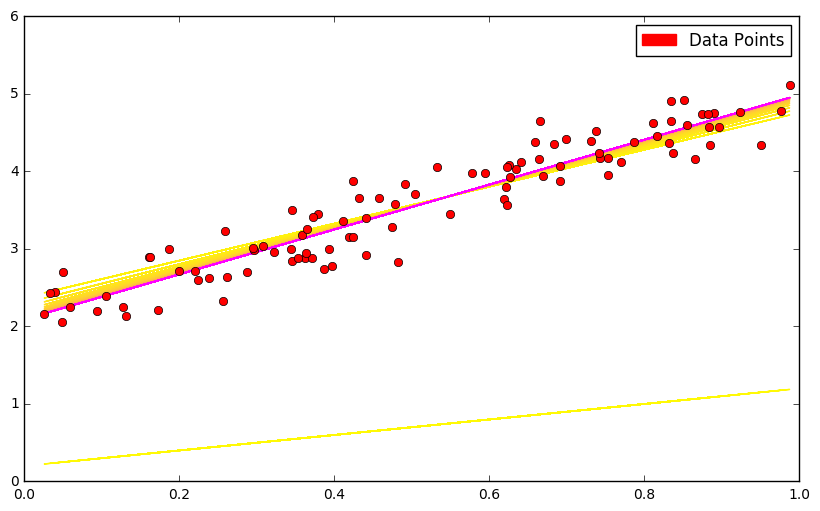

In [139]:
converters = plt.colors
cr, cg, cb = (1.0, 1.0, 0.0)
for f in train_data:
    cb += 1.0 / len(train_data)
    cg -= 1.0 / len(train_data)
    if cb > 1.0: cb  = 1.0
    if cg < 0.0: cg = 0.0
    [a, b] = f
    f_y = np.vectorize(lambda x : a*x + b)(x_data)
    line = plt.plot(x_data, f_y)
    plt.setp(line, color=(cr, cg, cb))

green_line = mpatches.Patch(color='red', label='Data Points')
plt.legend(handles=[green_line])
plt.plot(x_data, y_data, 'ro')
plt.show()